In [1]:
import cv2
import numpy as np
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt

from hfnet.datasets.hpatches import Hpatches
from hfnet.evaluation.visualize import draw_keypoints, draw_matches
from hfnet.evaluation.local_descriptors import evaluate, sift_loader, export_loader

from utils import plot_images

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
data_config = {'make_pairs': True, 'shuffle': True}
dataset = Hpatches(**data_config)

In [3]:
config = {
    'id': 'sift_ratio-0.75_500-kpts',
    'predictor': sift_loader,
    'num_features': 500,
    'match_thresh': 0.75,
    'do_ratio_test': True,
    'correct_match_thresh': 3,
    'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]
}

In [12]:
config = {
    'id': 'superpoint_dist-0.7_500-kpts-sift',
    'experiment': 'super_point_pytorch/hpatches',
    'predictor': export_loader,
    'num_features': 500,
    'keypoint_predictor': sift_loader,
    'remove_borders': 0,
    'match_thresh': 0.7,
    'do_ratio_test': False,
    'correct_match_thresh': 3,
    'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]
}

In [8]:
config = {
    'id': 'mobilenetvlad_layer-14_dist-0.7_500-kpts-sp',
    'experiment': 'mobilenetvlad_depth-0.35/hpatches_layer-14',
    'predictor': export_loader,
    'num_features': 500,
    'keypoint_predictor': export_loader,
    'keypoint_config': {'experiment': 'super_point_pytorch/hpatches'},
    'remove_borders': 0,
    'match_thresh': 0.75,
    'do_ratio_test': True,
    'correct_match_thresh': 3,
    'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]
}

In [ ]:
data_iter = dataset.get_test_set()
metrics, precision, recall, distances = evaluate(data_iter, config)
print('> {}'.format(config['id']))
for k, v in metrics.items():
    print('{:<25} {:.3f}'.format(k, v))
print(config)

580it [01:35,  6.09it/s]

> mobilenetvlad_layer-14_dist-0.7_500-kpts-sp
homography_correctness    0.600
matching_score            0.185
inlier_ratio              0.722
mAP                       0.522
{'id': 'mobilenetvlad_layer-14_dist-0.7_500-kpts-sp', 'experiment': 'mobilenetvlad_depth-0.35/hpatches_layer-14', 'predictor': <function export_loader at 0x2b67cb092a60>, 'num_features': 500, 'keypoint_predictor': <function export_loader at 0x2b67cb092a60>, 'keypoint_config': {'experiment': 'super_point_pytorch/hpatches', 'keypoint_predictor': None}, 'remove_borders': 0, 'match_thresh': 0.75, 'do_ratio_test': True, 'correct_match_thresh': 3, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


580it [03:12,  3.70it/s]

> mobilenetvlad_layer-14_ratio-0.75_500-kpts-sift
homography_correctness    0.293
matching_score            0.066
inlier_ratio              0.555
mAP                       0.292
{'id': 'mobilenetvlad_layer-14_ratio-0.75_500-kpts-sift', 'experiment': 'mobilenetvlad_depth-0.35/hpatches_layer-14', 'predictor': <function export_loader at 0x2abdd9e94a60>, 'num_features': 500, 'keypoint_predictor': <function sift_loader at 0x2abdd9e949d8>, 'remove_borders': 0, 'match_thresh': 0.75, 'do_ratio_test': True, 'correct_match_thresh': 3, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


580it [03:10,  4.13it/s]

> mobilenetvlad_layer-14
homography_correctness    0.412
matching_score            0.236
inlier_ratio              0.333
mAP                       0.393
{'id': 'mobilenetvlad_layer-14', 'experiment': 'mobilenetvlad_depth-0.35/hpatches_layer-14', 'predictor': <function export_loader at 0x2ad6e5b60a60>, 'num_features': 500, 'keypoint_predictor': <function sift_loader at 0x2ad6e5b60950>, 'remove_borders': 0, 'match_thresh': 0.7, 'do_ratio_test': False, 'correct_match_thresh': 3, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


580it [03:32,  3.75it/s]

> superpoint_dist-0.7_500-kpts-sift
homography_correctness    0.600
matching_score            0.328
inlier_ratio              0.616
mAP                       0.720
{'id': 'superpoint_dist-0.7_500-kpts-sift', 'experiment': 'super_point_pytorch/hpatches', 'predictor': <function export_loader at 0x2ad6e5b60a60>, 'num_features': 500, 'keypoint_predictor': <function sift_loader at 0x2ad6e5b60950>, 'remove_borders': 0, 'match_thresh': 0.7, 'do_ratio_test': False, 'correct_match_thresh': 3, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


580it [01:28, 14.56it/s]

> superpoint_dist-0.7_500-kpts
homography_correctness    0.781
matching_score            0.398
inlier_ratio              0.788
mAP                       0.794
{'id': 'superpoint_dist-0.7_500-kpts', 'experiment': 'super_point_pytorch/hpatches_new', 'pred_loader': <function predictions_loader at 0x2b24b78ed620>, 'num_features': 500, 'use_sift_keypoints': False, 'remove_borders': 4, 'match_thresh': 0.7, 'do_ratio_test': False, 'correct_match_thresh': 3, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


580it [01:42, 12.14it/s]


> superpoint_ratio-0.75_all-kpts
homography_correctness    0.748
matching_score            0.343
inlier_ratio              0.828
mAP                       0.743


580it [01:44, 12.27it/s]

> superpoint_dist-0.7_all-kpts
homography_correctness    0.755
matching_score            0.410
inlier_ratio              0.739
mAP                       0.738


580it [02:42,  4.87it/s]


> sift_ratio-0.75_500-kpts
homography_correctness    0.759
matching_score            0.238
inlier_ratio              0.795
mAP                       0.592


In [ ]:
plt.figure(dpi=100)
plt.plot(recall, precision);
plt.xlabel('Recall'), plt.ylabel('Precision'); plt.title(config['id']);
for t in config['plot_match_thresh']:
    op_idx = np.min(np.where(distances > t))
    plt.plot(recall[op_idx], precision[op_idx], marker='o', color='k', markersize=3)
    plt.annotate(str(t), xy=(recall[op_idx], precision[op_idx]))

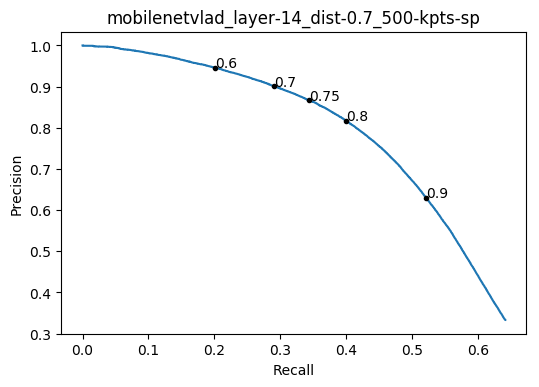

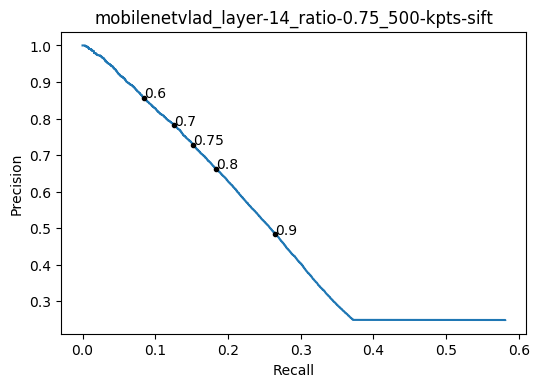

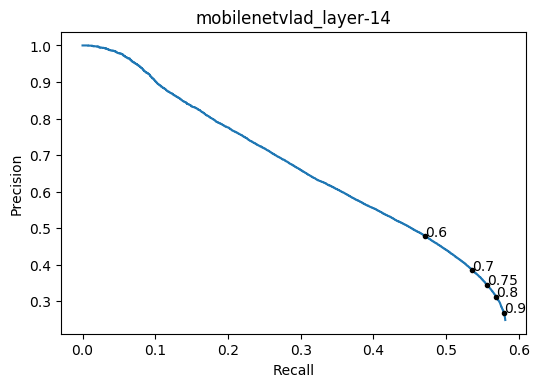

In [17]:
'sift + dist'

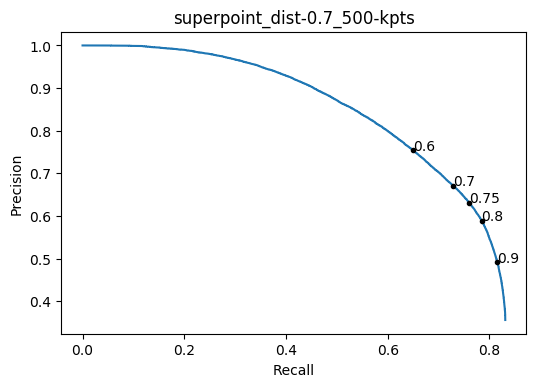

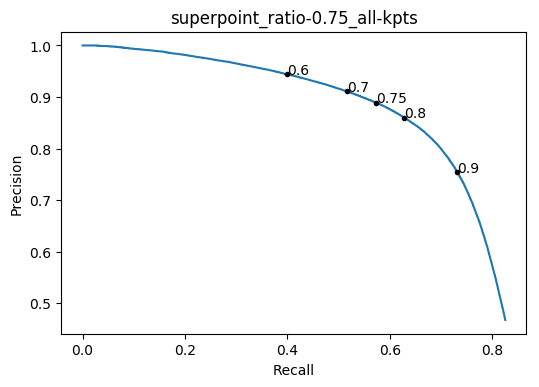

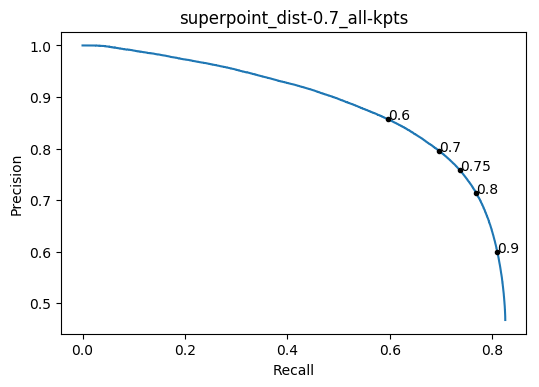

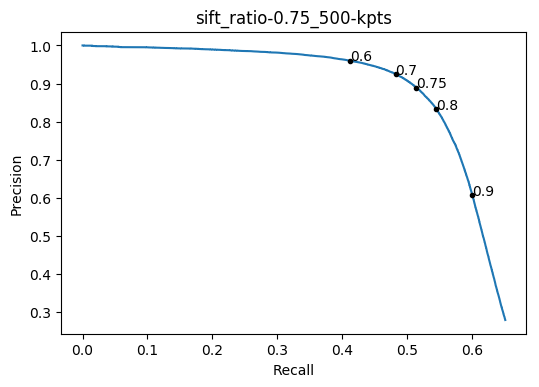

In [ ]:
plot_images([data['image_ref'],
             cv2.polylines(data['image'].copy(), [np.int32(corners1_gt)], True, 255, 3, cv2.LINE_AA)])

plot_images([data['image_ref'],
             cv2.polylines(data['image'].copy(), [np.int32(corners1)], True, 255, 3, cv2.LINE_AA)])